In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:

dataset_base_path = os.path.join(os.getcwd(), "./")
train_feats_path = os.path.join( dataset_base_path, "x_train.csv")
train_labels_path = os.path.join( dataset_base_path, "y_train.csv")

test_feats_path = os.path.join( dataset_base_path, "x_test.csv")
test_labels_path = os.path.join(dataset_base_path, "y_test.csv")


# train_data = np.loadtxt(train_feats_path, dtype=int)
x_train = pd.read_csv(train_feats_path, sep=',')
y_train = np.loadtxt(train_labels_path, dtype=int)
# val_data = np.loadtxt(test_feats_path, dtype=int)
x_test = pd.read_csv(test_feats_path, sep=',')
y_test = np.loadtxt(test_labels_path, dtype=int)

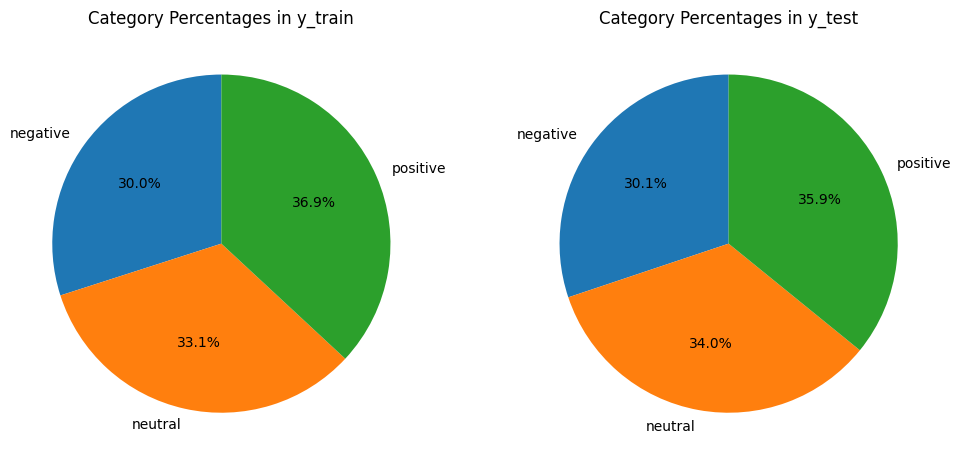

In [ ]:
#Question 3.1.1

label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
# Calculate total counts for y_train and y_test
total_y_train = len(y_train)
total_y_test = len(y_test)

categories_y_train = sorted(set(y_train))
categories_y_test = sorted(set(y_test))


y_train_counts = [sum(y_train == category) for category in categories_y_train]
y_train_percentages = [(count / total_y_train) * 100 for count in y_train_counts]

y_test_counts = [sum(y_test == category) for category in categories_y_test]
y_test_percentages = [(count / total_y_test) * 100 for count in y_test_counts]
# Map categories to descriptive names for the pie charts
y_train_labels = [label_mapping[category] for category in categories_y_train]
y_test_labels = [label_mapping[category] for category in categories_y_test]

# Plot pie charts for y_train and y_test
plt.figure(figsize=(12, 6))

# Pie chart for y_train
plt.subplot(1, 2, 1)
plt.pie(y_train_percentages, labels=y_train_labels, autopct='%1.1f%%', startangle=90)
plt.title('Category Percentages in y_train')

# Pie chart for y_test
plt.subplot(1, 2, 2)
plt.pie(y_test_percentages, labels=y_test_labels, autopct='%1.1f%%', startangle=90)
plt.title('Category Percentages in y_test')

plt.show()



In [ ]:
#Question 3.1.2 and 3.1.3


# Calculate and print prior probabilities for y_train
print("Prior Probabilities for y_train:")
y_train_prior_probabilities = [(label_mapping[category], percentage / 100) for category, percentage in zip(categories_y_train, y_train_percentages)]
for label, probability in y_train_prior_probabilities:
    print(f"Category {label}: {probability:.5f}")





Prior Probabilities for y_train:
Category negative: 0.29957
Category neutral: 0.33130
Category positive: 0.36913


A balanced dataset means that all classes (Negative, Neutral, Positive) have roughly equal representation. If the proportions of each class differ significantly, the dataset is skewed. As we can, see from the priors the dataset is nearly equal in terms of priors. A little bit skewed to the positive which can made a little bias in Naive Bayes but, at the end the values are close.

In [ ]:
#Question 3.1.4

# Calculate the total number of samples in both datasets
print('Number of training samples: ' + str(len(y_train)))
print('Number of validation samples: ' + str(len(y_test)))
print('Size of training data: ' + str(x_train.shape))
print('Size of validation data: ' + str(x_test.shape))


# Define the columns corresponding to the w1 and w2
good_column = 'good'
bad_column = 'bad'

positive_docs_train = x_train[y_train == 2]  #Positive Ones
good_count_train = positive_docs_train[good_column].sum()
bad_count_train = positive_docs_train[bad_column].sum()


total_words_positive_train = positive_docs_train.sum(axis=1).sum()

print(f"Total word count in positive documents: {total_words_positive_train}")
# Calculate the probabilities
p_good_given_positive = good_count_train / total_words_positive_train
p_bad_given_positive = bad_count_train / total_words_positive_train

log_p_good_given_positive = np.log(p_good_given_positive)
log_p_bad_given_positive = np.log(p_bad_given_positive)


print(f"Total count of 'good' in positive documents: {good_count_train}")
print(f"Total count of 'bad' in positive documents: {bad_count_train}")
print(f"Log Ratio of P(good | Y = positive): {log_p_good_given_positive}")
print(f"Log Ratio of P(bad | Y = positive): {log_p_bad_given_positive}")


Number of training samples: 2300
Number of validation samples: 700
Size of training data: (2300, 3000)
Size of validation data: (700, 3000)
Total word count in positive documents: 15068
Total count of 'good' in positive documents: 207
Total count of 'bad' in positive documents: 12
Log Ratio of P(good | Y = positive): -4.287609775546563
Log Ratio of P(bad | Y = positive): -7.135421919023932


In [ ]:
def confusion_matrix(y_true, y_pred, num_classes=3):
    """
    Rows represent the true classes, and columns represent the predicted classes.
    """
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_true)):
        t = y_true[i]
        p = y_pred[i]
        matrix[t][p] += 1

    print("Rows represent true classes, and columns represent predicted classes:")
    for i in range(num_classes):
        print(f"Class {i}: True labels represented by row {i}")
    return matrix

In [ ]:
# Bag-of-Words Representation and Multinomial Naive Bayes Model WITHOUT Drichlet Prior


#Q.3.2
number_of_words = x_train.shape[1]
feature_count = np.array([np.sum(y_train == i) for i in range(3)])  # For 3 classes
priors = feature_count / len(y_train)

# Calculate word counts per class
T = np.array([x_train[y_train == i].sum(axis=0) for i in range(3)])

# Calculate theta probabilities with two approaches
theta = T / T.sum(axis=1, keepdims=True)
# Avoid log(0) issues
theta[theta == 0] = -np.inf # Small value for stability


# Predict classes for each approach
log_priors = np.log(priors)
y_pred = np.argmax(np.dot(x_test, np.log(theta).T) + log_priors, axis=1)

# Accuracy calculation
accuracy = np.mean(y_test == y_pred)

print("Accuracy of Multinomial NB without Drichlet Prior (-np.inf): {:.3f}".format(accuracy))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy of Multinomial NB without Drichlet Prior (-np.inf): 0.301
Confusion Matrix:
Rows represent true classes, and columns represent predicted classes:
Class 0: True labels represented by row 0
Class 1: True labels represented by row 1
Class 2: True labels represented by row 2
[[211   0   0]
 [238   0   0]
 [251   0   0]]


<ipython-input-20-f3180b8221d3>:20: RuntimeWarning: invalid value encountered in log
  y_pred = np.argmax(np.dot(x_test, np.log(theta).T) + log_priors, axis=1)


In [ ]:
# Q3.3
# Multinomial Naive Bayes with Drichlett Prior
number_of_words = x_train.shape[1]
feature_count = np.array([np.sum(y_train == i) for i in range(3)])  # For 3 classes
priors = feature_count / len(y_train)

# Calculate word counts per class
T = np.array([x_train[y_train == i].sum(axis=0) for i in range(3)])
alpha = 1;
# Calculate theta probabilities with two approaches
theta = (T +alpha)/ (T.sum(axis=1, keepdims=True) + alpha*number_of_words)


theta[theta == 0] = 1e-12  # Small value for stability


# Predict classes for each approach
log_priors = np.log(priors)
y_pred = np.argmax(np.dot(x_test, np.log(theta).T) + log_priors, axis=1)

# Accuracy calculation
accuracy = np.mean(y_test == y_pred)
print("Accuracy of Multinomial NB with Dirichlet Prior (-np.inf): {:.3f}".format(accuracy))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy of Multinomial NB with Dirichlet Prior (-np.inf): 0.649
Confusion Matrix:
Rows represent true classes, and columns represent predicted classes:
Class 0: True labels represented by row 0
Class 1: True labels represented by row 1
Class 2: True labels represented by row 2
[[151  45  15]
 [ 73  86  79]
 [ 13  21 217]]


In [ ]:
# Q3.4
# Bernoulli Naive Bayes MODEL WITH ALPHA


# Conversion TO Binary
x_train_binary = (x_train > 0).astype(int)
x_test_binary = (x_test > 0).astype(int)

# Number of words (features) and classes
number_of_words = max(x_train.shape)
feature_count = np.array([np.sum(y_train == i) for i in range(3)])  # For 3 classes
priors = feature_count / len(y_train)
print(feature_count.reshape(-1, 1))
# Calculate word counts per class for binary (presence/absence)
S = np.array([x_train_binary[y_train == i].sum(axis=0) for i in range(3)])




alpha = 1  # Laplace smoothing

theta = (S + alpha) / (feature_count.reshape(-1, 1) + 2 * alpha)

# Avoid log(0) by adding a small value where necessary
theta[theta == 0] = 1e-12

# Compute log probabilities for presence and absence
log_theta = np.log(theta)
log_1_minus_theta = np.log(1 - theta)

# Log priors
log_priors = np.log(priors)

# Bernoulli Naive Bayes prediction
bernoulli_log_probs = (x_test_binary @ log_theta.T) + ((1 - x_test_binary) @ log_1_minus_theta.T)
y_pred = np.argmax(bernoulli_log_probs + log_priors, axis=1)

accuracy = np.mean(y_test == y_pred)

print("Accuracy of Bernoulli NB with Dirichlet Prior (-np.inf): {:.3f}".format(accuracy))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



[[689]
 [762]
 [849]]
Accuracy of Bernoulli NB with Dirichlet Prior (-np.inf): 0.641
Confusion Matrix:
Rows represent true classes, and columns represent predicted classes:
Class 0: True labels represented by row 0
Class 1: True labels represented by row 1
Class 2: True labels represented by row 2
[[113  90   8]
 [ 29 180  29]
 [ 19  76 156]]
